# Assignment 3

The US Department of Agriculture publishes price estimates for fruits and vegetables [online](https://www.ers.usda.gov/data-products/fruit-and-vegetable-prices/fruit-and-vegetable-prices/). The most recent estimates are based on a 2013 survey of US retail stores.

The estimates are provided as a collection of MS Excel files, with one file per fruit or vegetable. The `assignment3_data.zip` file contains the fruit and vegetable files in the directories `fruit` and `vegetables`, respectively.

__Exercise 1.1.__ Use pandas to extract the "Fresh" row(s) from the <strong style="color:#B0B">fruit</strong> Excel files. Combine the data into a single data frame. Your data frame should look something like this:

type       | food       | form   | price_per_lb | yield | lb_per_cup | price_per_cup
---------- | ---------- | ------ | ------------ | ----- | ---------- | -------------
fruit      | watermelon | Fresh1 | 0.333412     | 0.52  | 0.330693   | 0.212033
fruit      | cantaloupe | Fresh1 | 0.535874     | 0.51  | 0.374786   | 0.3938
vegetables | onions     | Fresh1 | 1.03811      | 0.9   | 0.35274    | 0.406868
...        |            |        |              |       |            |


It's okay if the rows and columns of your data frame are in a different order. These modules are especially relevant:

* [`str` methods](https://docs.python.org/2/library/stdtypes.html#string-methods)
* [`os`](https://docs.python.org/2/library/os.html)
* [`os.path`](https://docs.python.org/2/library/os.path.html)
* [pandas](http://pandas.pydata.org/pandas-docs/stable/): `read_excel()`, `concat()`, `.fillna()`, `.str`, plotting methods

Ask questions and search the documentation/web to find the functions you need.


In [82]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import os.path
import os

In [122]:
fruitnames = [x for x in os.listdir('G:/study/2016-2017/winter/141b/hw/hw3/fruit')
             if x.endswith("xlsx")]

In [21]:
def extract_fresh(fname,kind):
    """
    Extract the fresh information from bunches of files
    
    Arguments:
        fname:the name of file, as well the name of food
        kind: the upper file of the filename, aka the type of food
        
    Returns:
        The information of fresh row of the food
    """
    f = pd.read_excel('G:/study/2016-2017/winter/141b/hw/hw3/'+kind+'/'+fname,header=1)
    fresh = f[f['Form'].str.contains('Fresh')==True]
    name = os.path.splitext(fname)
    fresh['food']= name[0]
    return fresh

In [84]:
freshfruit = [extract_fresh(x, 'fruit') for x in fruitnames]
fruittable = pd.concat(freshfruit) #stack the rows together

fruittable = fruittable.drop(['Unnamed: 2','Unnamed: 5','Unnamed: 7','Unnamed: 8'],axis=1)
fruittable.columns = ["price_per_cup",'price_per_lb','form',"yield","lb_per_cup","food" ]
n,_ = fruittable.shape
fruittable.index = range(n)
fruittable

d:\python27\lib\site-packages\ipykernel\__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,price_per_cup,price_per_lb,form,yield,lb_per_cup,food
0,0.422373,1.56752,Fresh1,0.9,0.242508,apples
1,1.1891,3.04007,Fresh1,0.93,0.363763,apricots
2,0.292965,0.566983,Fresh1,0.64,0.330693,bananas
3,1.92292,5.77471,Fresh1,0.96,0.31967,blackberries
4,1.59318,4.73462,Fresh1,0.95,0.31967,blueberries
5,0.3938,0.535874,Fresh1,0.51,0.374786,cantaloupe
6,1.33455,3.59299,Fresh1,0.92,0.341717,cherries
7,0.848278,0.897802,Fresh1,0.49,0.462971,grapefruit
8,0.721266,2.09383,Fresh1,0.96,0.330693,grapes
9,0.649077,0.796656,Fresh1,0.46,0.374786,honeydew


__Exercise 1.2.__ Reuse your code from exercise 1.1 to extract the "Fresh" row(s) from the <strong style="color:#B0B">vegetable</strong> Excel files.

Does your code produce the correct prices for tomatoes? If not, why not? Do any other files have the same problem as the tomatoes file?

You don't need to extract the prices for these problem files. However, make sure the prices are extracted for files like asparagus that don't have this problem.

In [85]:
vegenames = [x for x in os.listdir('G:/study/2016-2017/winter/141b/hw/hw3/vegetables')
             if x.endswith("xlsx")]
freshvege = [extract_fresh(x, 'vegetables') for x in vegenames]
vegetable = pd.concat(freshvege) #stack the rows together

vegetable = vegetable.drop(['Unnamed: 2','Unnamed: 5','Unnamed: 7','Unnamed: 8'],axis=1)
vegetable.columns = ["price_per_cup",'price_per_lb','form',"yield","lb_per_cup","food" ]
m,_ = vegetable.shape
vegetable.index = range(m)
vegetable

d:\python27\lib\site-packages\ipykernel\__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,price_per_cup,price_per_lb,form,yield,lb_per_cup,food
0,1.15536,1.17225,Fresh1,0.458554,0.451948,acorn_squash
1,2.27497,2.21305,Fresh1,0.375309,0.385809,artichoke
2,2.58227,3.21349,Fresh1,0.493835,0.396832,asparagus
3,0.964886,2.23587,Fresh1,0.740753,0.31967,avocados
4,NaN,,Fresh,,,broccoli
5,0.890898,2.76355,Fresh1,1.06,0.341717,brussels_sprouts
6,0.787893,1.24474,Fresh1,0.714,0.451948,butternut_squash
7,0.245944,0.579208,Fresh green cabbage1,0.778797,0.330693,cabbage
8,0.448412,1.05645,Fresh red cabbage1,0.779107,0.330693,cabbage
9,NaN,NaN,Fresh,NaN,NaN,carrots


The result is presented above. 

It didn't produce the correct prices for tomatoes. It generated NaN for data about prices of tomatoes. 

After checking the original data, although we get the 'Fresh1' tag there's no data in the row of 'Fresh1'. That is the information of 'Fresh' tomatoes is missing. 

I can't produce it properly. There are 8 kinds of vegetables have the same problem:

lettuce_romaine, spinach, mushrooms, carrots, cauliflower,celery broccoli, tomatoes

__Exercise 1.3.__ Remove rows without a price from the vegetable data frame and then combine the fruit and vegetable data frames. Make sure all columns of numbers are numeric (not strings).

In [86]:
vegetable = vegetable[vegetable['price_per_cup'].notnull()]
vegetable['type'] = 'vegetables'
fruittable['type'] = 'fruit'
fresh = pd.concat([fruittable, vegetable], ignore_index = True)
COL = ('type','food','form','price_per_cup','price_per_lb','yield','lb_per_cup')
fresh = fresh.ix[:,COL]
fresh.to_csv('G:/study/2016-2017/winter/141b/hw/hw3/fresh.csv')
fresh

d:\python27\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,type,food,form,price_per_cup,price_per_lb,yield,lb_per_cup
0,fruit,apples,Fresh1,0.422373,1.56752,0.9,0.242508
1,fruit,apricots,Fresh1,1.1891,3.04007,0.93,0.363763
2,fruit,bananas,Fresh1,0.292965,0.566983,0.64,0.330693
3,fruit,blackberries,Fresh1,1.92292,5.77471,0.96,0.31967
4,fruit,blueberries,Fresh1,1.59318,4.73462,0.95,0.31967
5,fruit,cantaloupe,Fresh1,0.3938,0.535874,0.51,0.374786
6,fruit,cherries,Fresh1,1.33455,3.59299,0.92,0.341717
7,fruit,grapefruit,Fresh1,0.848278,0.897802,0.49,0.462971
8,fruit,grapes,Fresh1,0.721266,2.09383,0.96,0.330693
9,fruit,honeydew,Fresh1,0.649077,0.796656,0.46,0.374786


__Exercise 1.4.__ Discuss the questions below (a paragraph each is sufficient). Use plots to support your ideas.

* What kinds of fruits are the most expensive (per pound)? What kinds are the least expensive?
* How do the price distributions compare for fruit and vegetables?
* Which foods are the best value for the price?
* What's something surprising about this data set?
* Which foods do you expect to provide the best combination of price, yield, and nutrition? A future assignment may combine this data set with another so you can check your hypothesis.

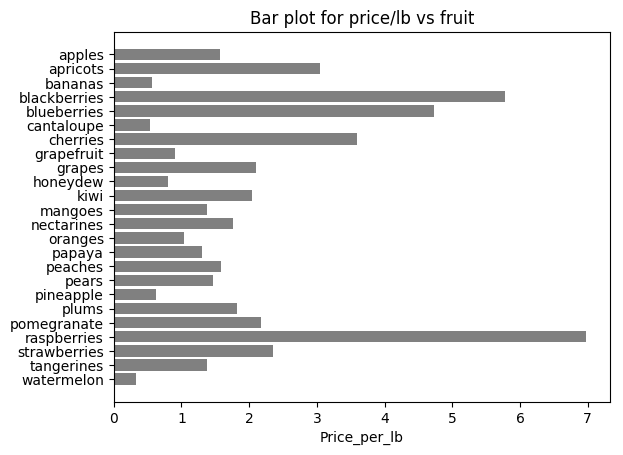

max: raspberries
min: watermelon


In [105]:
fig,ax = plt.subplots()
y_pos = np.arange(len(fruittable['food']))
ax.barh(y_pos, fruittable['price_per_lb'], align='center', color = 'grey')
ax.set_yticks(y_pos)
ax.set_yticklabels(fruittable['food'])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Price_per_lb')
ax.set_title('Bar plot for price/lb vs fruit')

plt.show()
print "max:",fruittable.iloc[fresh['price_per_lb'].idxmax()]['food']
print 'min:',fruittable.iloc[fresh['price_per_lb'].idxmin()]['food']

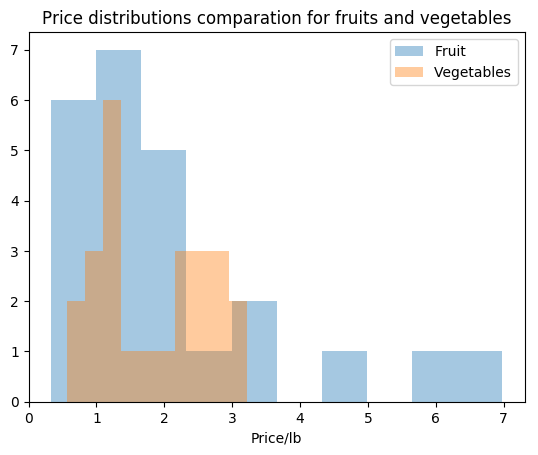

In [100]:
plt.hist(fresh[fresh['type'] == 'fruit']['price_per_lb'] , bins = 10, alpha = .4, label = 'Fruit')
plt.hist(fresh[fresh['type'] == 'vegetables']['price_per_lb'] , bins = 10, alpha = .4, label = 'Vegetables')
plt.legend()
plt.title('Price distributions comparation for fruits and vegetables')
plt.xlabel('Price/lb')
plt.show()

b) Conclusions:
1. The price range of fruit is larger than vegetables, the range of fruit is [0,7], the range of vegetables is [0,3.5];
2. Both distributions are a little bit right skewed;
3. The mode prices of fruit and vegetables are almost the same;
4. The average price of fruit may be larger than vegetables.

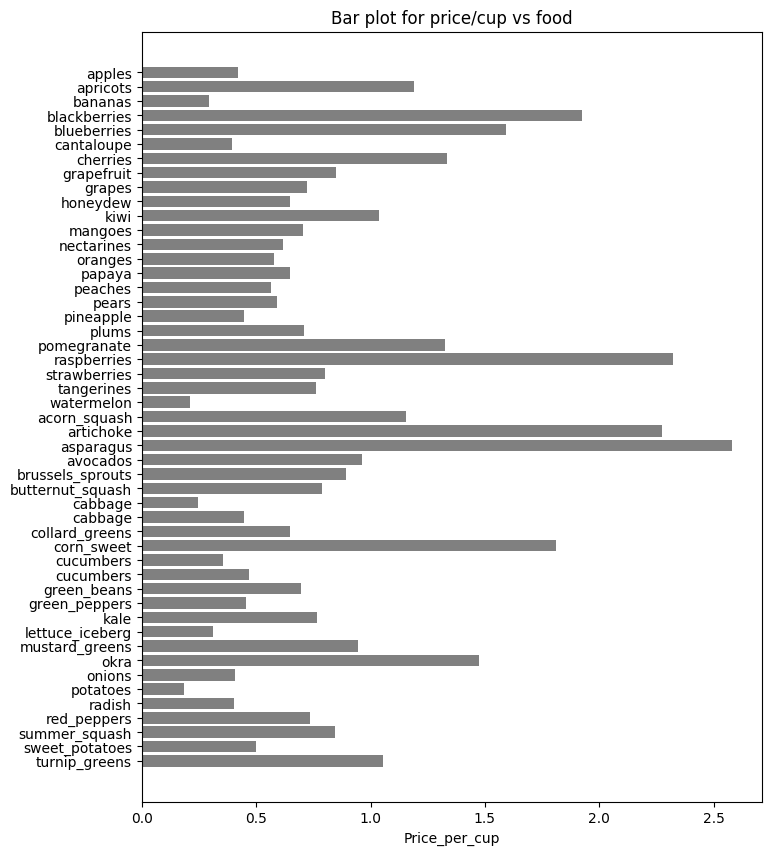

max: asparagus
min: potatoes


In [108]:
fig,ax = plt.subplots(figsize=(8, 10))
y = np.arange(len(fresh['food']))
ax.barh(y, fresh['price_per_cup'], align='center', color = 'grey')
ax.set_yticks(y)
ax.set_yticklabels(fresh['food'])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Price_per_cup')
ax.set_title('Bar plot for price/cup vs food')

plt.show()
print "max:",fresh.iloc[fresh['price_per_cup'].idxmax()]['food']
print 'min:',fresh.iloc[fresh['price_per_cup'].idxmin()]['food']

c) Asparagus has the largest value of price per cup. From this result I can derive that asparague is the best value for price.

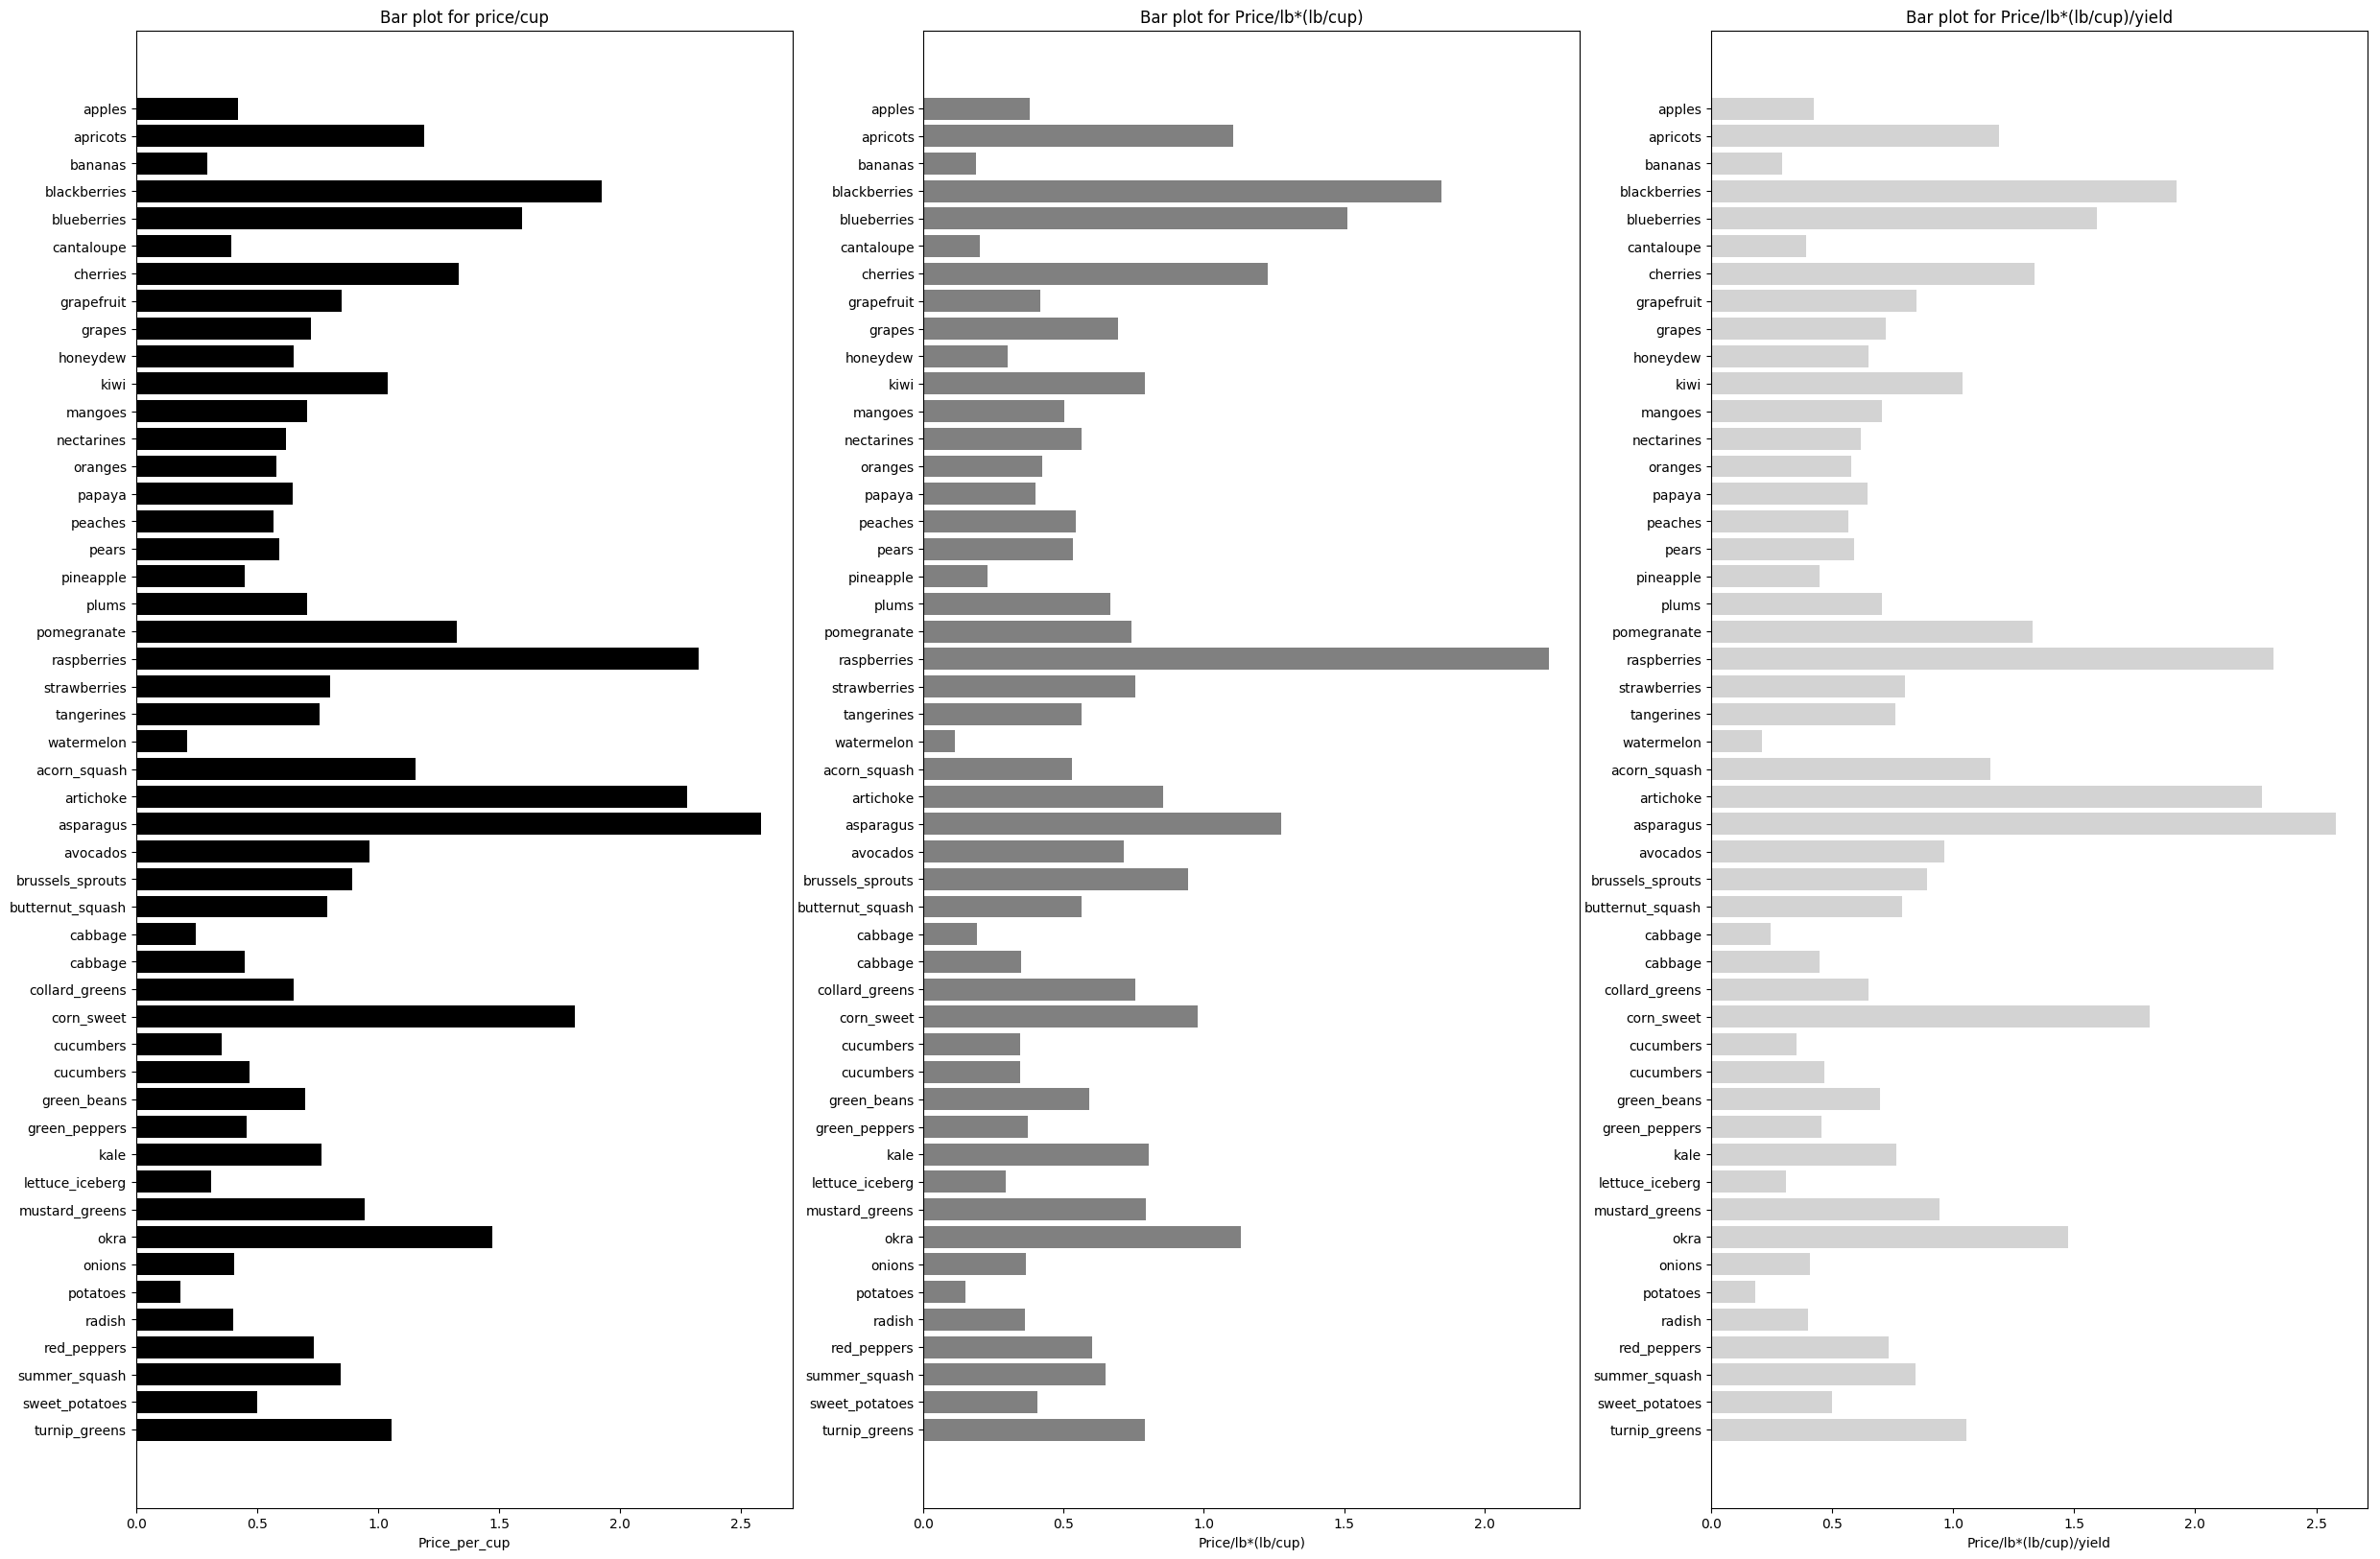

In [121]:
fig,(ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(30, 20))
y = np.arange(len(fresh['food']))

ax1.barh(y, fresh['price_per_cup'], align='center', color = 'black')
ax1.set_yticks(y)
ax1.set_yticklabels(fresh['food'])
ax1.invert_yaxis()  # labels read top-to-bottom
ax1.set_xlabel('Price_per_cup')
ax1.set_title('Bar plot for price/cup')

ax2.barh(y, (fresh['price_per_lb']*fresh['lb_per_cup']), align='center', color = 'grey')
ax2.set_yticks(y)
ax2.set_yticklabels(fresh['food'])
ax2.invert_yaxis()  # labels read top-to-bottom
ax2.set_xlabel('Price/lb*(lb/cup)')
ax2.set_title('Bar plot for Price/lb*(lb/cup)')

ax3.barh(y, (fresh['price_per_lb']*fresh['lb_per_cup']/fresh['yield']), align='center', color = 'lightgrey')
ax3.set_yticks(y)
ax3.set_yticklabels(fresh['food'])
ax3.invert_yaxis()  # labels read top-to-bottom
ax3.set_xlabel('Price/lb*(lb/cup)/yield')
ax3.set_title('Bar plot for Price/lb*(lb/cup)/yield')
plt.show()

d) The first figure is price/cup

The second figure is
$$Price/lb \times lb/cup$$
The result should be the same as the first one. However as we can see in the figure, the calculate results are different from the value of price/cup in table.

So I attempted 
$$\frac{Price/lb \times lb/cup}{yiels}$$
Then the prices display in the third figure become the same as the first one.

Thus we can derive a formula for these three variables
$$Price/cup = \frac{Price/lb \times lb/cup}{yield}$$

e) For the data we get now, there is no detail about nutrition so we cannot derive an answer by optimizing. As far as I concerned, apple may be the right answer.